## Consumer Theory Duality using Python

### This python script is for visualizing indifference curves and the duality properties of consumer theory in microeconomics.


In [9]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt
from sympy import init_printing
from sympy.utilities import lambdify
from sympy.parsing.sympy_parser import parse_expr
from matplotlib.widgets import Slider, Button, RadioButtons
init_printing()

First, declare all the symbols used in the equation.  The equation, for now, accepts:
- U - Utility
- x,y - Two goods
- a - A taste parameter for x.

A combination of sympy parsing and lambdify takes text input and makes it into a functional form for an indifference curve.  The graph should be interactive, allowing the user to change the taste parameter to look at the effect on the indifference curve and visualize the role of $\alpha$ in a Cobb-Douglas utility function.

### Cobb-Douglas example

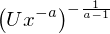

In [99]:
# Declare all symbols used in the equation and solve for y
x, y, U,a= sm.symbols("x y U a")
u = "x**a * y**(1-a)"
u= parse_expr(u)
yexp= sm.solve(u-U,y)[0]
yexp

In [63]:
y1 = lambdify([U,x,a],yexp)
# now it takes number input in the order U, x, and a.
y1(10,1,.5)

In [101]:
# interactive plot, based on http://matplotlib.org/examples/widgets/slider_demo.html

# Set plot of IC
fig,ax =plt.subplots()
a0=.5
u_grid = np.arange(10,25,5)
xdom = np.arange(.5,30,.0001)
l,= plt.plot(xdom,y1(u_grid[1],xdom,a0),lw=2,color='black')
plt.ylim(0,100)

# Set slider
axcolor = 'lightgoldenrodyellow'
axa = plt.axes([0.1, 0.01, 0.65, 0.03], axisbg=axcolor)
salph  = Slider(axa, 'Alpha', 0.01, .99, valinit=a0)

def update(val):
    alph = salph.val
    l.set_ydata(y1(u_grid[1],xdom,alph))
    fig.canvas.draw_idle()
salph.on_changed(update)

# the reset button doesnt work yet

#resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
#button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

#def reset(event):
#    alph.reset()
#button.on_clicked(reset)

In [102]:
plt.show()

### Next steps
- Introduce the budget line in a function and solve for the indirect utility function to plot the indifference curve tangent to its budget line.
- Label the optimal choice bundle on the graph and make it change with the slider.
- Have two sliders, one for each price of x and y.